# Métodos Numéricos 2019.1
## Patric Lacouth
### lacouth@gmail.com

# Raízes - Principais Métodos

1. Busca Incremental
2. Bisseção
3. Newton-Raphson
4. Secante

## Busca Incremental

* Dado um intervalo, se $f(x)$ mudar de sinal então existem pelo menos uma raiz
$$ f(x_1)f(x_2) < 0 $$
* Determinar subintervalos com raízes
* Lento
* Pode não encontrar todos os subintervalos

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

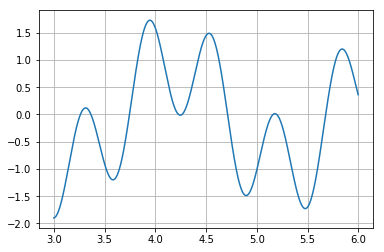

In [6]:

x = np.arange(3,6,0.001) # de 3 até 6 com incremento de 0.01
fx = np.sin(10*x)+np.cos(3*x)
plt.plot(x,fx)
plt.grid(True)
plt.show()

## BI - Implementação

In [7]:
def busca_incremental(funcao, xmin, xmax, passo = 0.1):
    x = np.arange(xmin, xmax, passo)
    subintervalos = []
    for xi in x:
        if funcao(xi)*funcao(xi+passo) < 0:
            subintervalos.append([xi,xi+passo])
    return subintervalos  

## Aplicando o algoritmo

In [8]:
def sen10_cos3(x):
    return np.sin(10*x)+np.cos(3*x)

In [11]:
intervalos = busca_incremental(sen10_cos3,3,6,0.01)
print('Foram encontrados {} subintervalos: '.format(len(intervalos)))
intervalos

Foram encontrados 9 subintervalos: 


[[3.2599999999999945, 3.2699999999999942],
 [3.3599999999999923, 3.369999999999992],
 [3.7399999999999842, 3.749999999999984],
 [4.219999999999974, 4.229999999999974],
 [4.259999999999973, 4.269999999999973],
 [4.7099999999999635, 4.719999999999963],
 [5.159999999999954, 5.169999999999954],
 [5.189999999999953, 5.199999999999953],
 [5.669999999999943, 5.679999999999943]]

# Bisseção

* Método Intervalar
* Sempre converge
* Simples - Busca Binária
* Equação de atualização:

$$  x_{meio} = \frac{(x_{max}+x_{min})}{2} $$

# Como calcular o erro de aproximação?

* Podemos fazer uma estimativa através de :

$$ | \varepsilon_a | = \left | \frac{x^{novo}_r - x^{velho}_r }{x^{novo}_r} \right| \times 100% $$

* O erro de aproximação estima o quanto o estimativa do algoritmo está se "movendo" ao longo das iterações.
* Não indica o quanto estamos próximos da resposta real.
* $ \varepsilon_a <= 5 \% $ indica que o primeiro dígito significativo já foi estimado.
* $ \varepsilon_a <= 0.5 \%$ indica que os dois primeiros dígitos significativos já foram estimados
* $ \varepsilon_a <= 0.05 \%$ indica que os três primeiros dígitos significativos já foram estimados
* ...


## A implementação

In [15]:
def x3_20(x):
    return x**3-20

In [16]:
def bissecao(funcao,xmin, xmax, tol = 0.0001, max_it = 100):
    raiz = []
    erro = []
    if funcao(xmin) * funcao(xmax) > 0 :
        print("A raiz não está isolada")
        return
    else:
        for i in range(max_it):
            raiz.append((xmin+xmax)/2);
            
            if funcao(raiz[i]) * funcao(xmax) < 0 :
                xmin = raiz[i]
            elif funcao(raiz[i]) * funcao(xmin) < 0 :
                xmax = raiz[i]
            else:
                break       
            
            if i > 0:
                erro.append(abs((raiz[i] - raiz[i-1])/raiz[i])*100)
                if erro[-1] < tol:
                    break
        return raiz, erro

In [19]:
raizes, erros = bissecao(x3_20, 1,4.0, 0.0001)
raizes[-1]

2.7144179344177246

## Erro x Iteração

In [44]:
r = 20**(1/3) ## Resposta exata
erro_real = []
for raiz in raizes:
    erro_real.append(abs((raiz-r)/raiz)*100)

In [42]:
it = np.arange(0,len(raizes))
it2 = np.arange(0,len(erros))

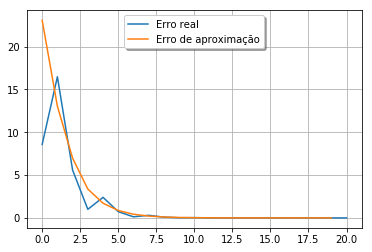

In [45]:
fig, ax = plt.subplots()
ax.plot(it, erro_real, label='Erro real')
ax.plot(it2, erros, label='Erro de aproximação')
legend = ax.legend(loc='upper center', shadow=True)
plt.grid(True)
plt.show()

# Newton - Raphson

* Método aberto
* Precisa de um "chute" inicial $x_0$
* Mais rápido
* Sem convergência garantida
* Precisa da derivada da função $f(x)$

# Newton - Raphson

## Equação de atualização:

$$ x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)} $$

# Secante

* Método aberto
* Precisa de DOIS "chutes" iniciais $x_0$ e $x_1$
* Similar ao Newton-Raphson mas sem a necessidade da derivada analítica

# Secante

## Equação de atualização:

$$ x_{i+1} = x_i - \frac{f(x_i)(x_i-x_{i-1})}{f(x_i)-f(x_i-1)} $$

# Go code!